# Data Preprocessing Tools

## Importing the libraries

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel
import torch 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LinearRegression

## Importing the dataset

In [171]:
dataset = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [172]:
print(X.shape)
print(X.dtypes)

(104, 4)
id             int64
job_title     object
location      object
connection    object
dtype: object


In [173]:
print(y)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
99    NaN
100   NaN
101   NaN
102   NaN
103   NaN
Name: fit, Length: 104, dtype: float64


In [174]:
y.fillna(value=0)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
99     0.0
100    0.0
101    0.0
102    0.0
103    0.0
Name: fit, Length: 104, dtype: float64

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_38958/3017713155.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  X['connection'].value_counts().plot(kind='bar',color="orange", colormap="warm")
/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_38958/3017713155.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  X['connection'].value_counts().plot(kind='bar',color="orange", colormap="warm")


<Axes: xlabel='connection'>

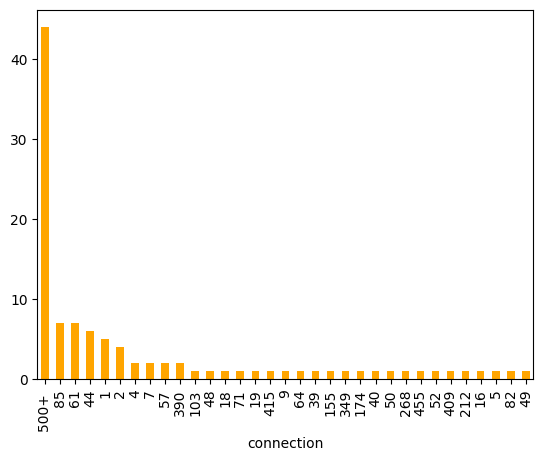

In [175]:
X['connection'].value_counts().plot(kind='bar',color="orange", colormap="warm")

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_38958/3025138235.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  X['location'].value_counts().plot(kind='bar',color="blue", colormap="warm")
/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_38958/3025138235.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  X['location'].value_counts().plot(kind='bar',color="blue", colormap="warm")


<Axes: xlabel='location'>

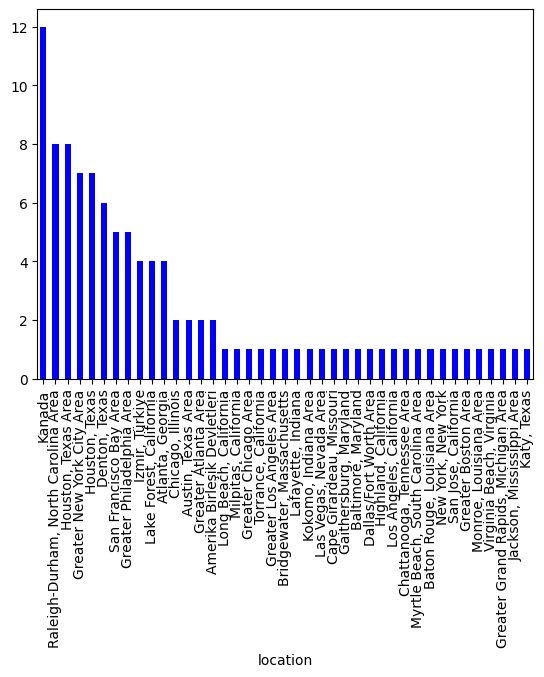

In [176]:
X['location'].value_counts().plot(kind='bar',color="blue", colormap="warm")

In [177]:
X['job_title'].value_counts()

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, C

In [178]:
print(X)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location connection  
0                         Houston, Texas         85  
1                                 Kanada      500+   
2    Raleigh-Durham, North Carolina Area         44  
3                          

## Encoding categorical data

### Encoding the Independent Variable

In [179]:
le = LabelEncoder()
# X['job_title'] = le.fit_transform(X['job_title'])
X['location'] = le.fit_transform(X['location'])
# X['connection'] = le.fit_transform(X['connection'])
le.classes_

array(['Amerika Birleşik Devletleri', 'Atlanta, Georgia',
       'Austin, Texas Area', 'Baltimore, Maryland',
       'Baton Rouge, Louisiana Area', 'Bridgewater, Massachusetts',
       'Cape Girardeau, Missouri', 'Chattanooga, Tennessee Area',
       'Chicago, Illinois', 'Dallas/Fort Worth Area', 'Denton, Texas',
       'Gaithersburg, Maryland', 'Greater Atlanta Area',
       'Greater Boston Area', 'Greater Chicago Area',
       'Greater Grand Rapids, Michigan Area', 'Greater Los Angeles Area',
       'Greater New York City Area', 'Greater Philadelphia Area',
       'Highland, California', 'Houston, Texas', 'Houston, Texas Area',
       'Jackson, Mississippi Area', 'Kanada', 'Katy, Texas',
       'Kokomo, Indiana Area', 'Lafayette, Indiana',
       'Lake Forest, California', 'Las Vegas, Nevada Area',
       'Long Beach, California', 'Los Angeles, California',
       'Milpitas, California', 'Monroe, Louisiana Area',
       'Myrtle Beach, South Carolina Area', 'New York, New York',
     

In [180]:
print(X)

      id                                          job_title  location   
0      1  2019 C.T. Bauer College of Business Graduate (...        20  \
1      2  Native English Teacher at EPIK (English Progra...        23   
2      3              Aspiring Human Resources Professional        35   
3      4             People Development Coordinator at Ryan        10   
4      5    Advisory Board Member at Celal Bayar University        40   
..   ...                                                ...       ...   
99   100  Aspiring Human Resources Manager | Graduating ...         6   
100  101              Human Resources Generalist at Loparex        35   
101  102   Business Intelligence and Analytics at Travelers        17   
102  103                     Always set them up for Success        16   
103  104   Director Of Administration at Excellence Logging        24   

    connection  
0           85  
1        500+   
2           44  
3        500+   
4        500+   
..         ...  
99  

### Converting connection Column into Integer

In [181]:
X['connection']= X['connection'].str.rstrip('+ ')
X['connection'] = X['connection'].astype('Int64')
print(X['connection'].describe)

<bound method NDFrame.describe of 0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connection, Length: 104, dtype: Int64>


/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_38958/3017713155.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  X['connection'].value_counts().plot(kind='bar',color="orange", colormap="warm")
/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_38958/3017713155.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  X['connection'].value_counts().plot(kind='bar',color="orange", colormap="warm")


<Axes: xlabel='connection'>

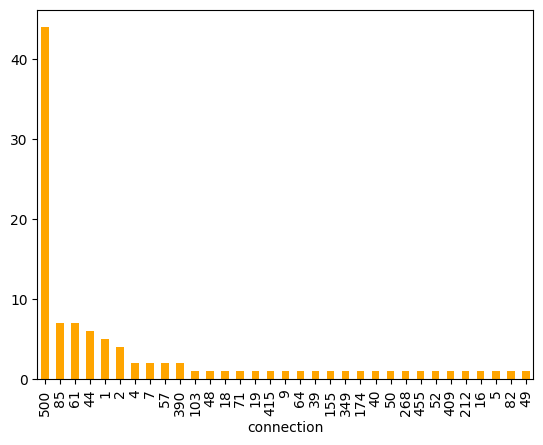

In [182]:
X['connection'].value_counts().plot(kind='bar',color="orange", colormap="warm")

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_38958/3025138235.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  X['location'].value_counts().plot(kind='bar',color="blue", colormap="warm")
/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_38958/3025138235.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  X['location'].value_counts().plot(kind='bar',color="blue", colormap="warm")


<Axes: xlabel='location'>

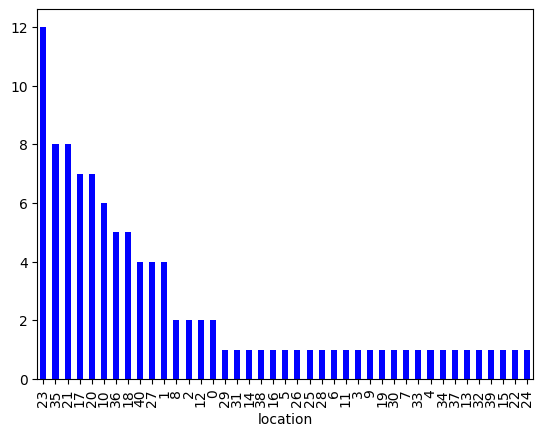

In [183]:
X['location'].value_counts().plot(kind='bar',color="blue", colormap="warm")

In [184]:
X['job_title'].value_counts()#.plot(kind='hist')#,autopct='%1.1f%%')

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, C

### Tokenization and Word Embedding

## Using BERT

In [185]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

embeddings = model.encode(X['job_title'])

print(embeddings)

[[-0.8347965   0.70619303  1.4111348  ... -0.56787384 -0.4621882
  -0.05634962]
 [-1.104153    0.68182105  0.480935   ...  0.6230358  -0.49469456
  -0.38667932]
 [ 0.4692795   0.28294754  2.3300831  ... -0.94529396 -1.2034429
  -0.5755402 ]
 ...
 [-0.53681445  0.60714734  1.6983953  ... -1.0517942  -1.7634553
  -0.33110973]
 [ 0.12111365 -0.07036974  2.3149621  ... -0.59082496 -0.11437552
  -0.608715  ]
 [-0.9533589   0.9029402   1.0139453  ... -0.39403832 -0.82095873
  -1.1976473 ]]


In [186]:
print(X)

      id                                          job_title  location   
0      1  2019 C.T. Bauer College of Business Graduate (...        20  \
1      2  Native English Teacher at EPIK (English Progra...        23   
2      3              Aspiring Human Resources Professional        35   
3      4             People Development Coordinator at Ryan        10   
4      5    Advisory Board Member at Celal Bayar University        40   
..   ...                                                ...       ...   
99   100  Aspiring Human Resources Manager | Graduating ...         6   
100  101              Human Resources Generalist at Loparex        35   
101  102   Business Intelligence and Analytics at Travelers        17   
102  103                     Always set them up for Success        16   
103  104   Director Of Administration at Excellence Logging        24   

     connection  
0            85  
1           500  
2            44  
3           500  
4           500  
..          ...

## Using Word2Vec

In [187]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X['job_title'])
sequences = tokenizer.texts_to_sequences(X['job_title'])

In [188]:
word2vec_model = Word2Vec(sentences=sequences, vector_size=100, window=5, min_count=1)


In [189]:
# 4. Sequence Padding
max_seq_length = 100  # Define the desired sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [191]:
print(sequences)

[[18, 19, 20, 21, 9, 13, 14, 22, 23, 24, 25, 5, 4, 1, 2, 6], [34, 15, 35, 3, 36, 15, 37, 16, 38], [4, 1, 2, 6], [29, 30, 17, 3, 31], [41, 42, 43, 3, 44, 45, 11], [4, 1, 2, 12], [7, 3, 26, 9, 5, 4, 1, 2, 10], [32, 33, 12], [7, 3, 26, 9, 5, 4, 1, 2, 10], [8, 1, 2, 46, 5, 10, 47], [7, 3, 48, 11], [49, 50, 51, 52, 53, 54, 55, 56, 39, 57, 58, 59, 60], [1, 2, 17, 3, 61, 62, 63], [18, 19, 20, 21, 9, 13, 14, 22, 23, 24, 25, 5, 4, 1, 2, 6], [18, 19, 20, 21, 9, 13, 14, 22, 23, 24, 25, 5, 4, 1, 2, 6], [34, 15, 35, 3, 36, 15, 37, 16, 38], [4, 1, 2, 6], [29, 30, 17, 3, 31], [18, 19, 20, 21, 9, 13, 14, 22, 23, 24, 25, 5, 4, 1, 2, 6], [34, 15, 35, 3, 36, 15, 37, 16, 38], [4, 1, 2, 6], [29, 30, 17, 3, 31], [41, 42, 43, 3, 44, 45, 11], [4, 1, 2, 12], [7, 3, 26, 9, 5, 4, 1, 2, 10], [32, 33, 12], [4, 1, 2, 27, 7, 8, 40, 65], [8, 1, 2, 64], [4, 1, 2, 27, 7, 8, 40, 65], [8, 1, 2, 64], [18, 19, 20, 21, 9, 13, 14, 22, 23, 24, 25, 5, 4, 1, 2, 6], [34, 15, 35, 3, 36, 15, 37, 16, 38], [4, 1, 2, 6], [29, 30, 17,

## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train, X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
lr = LinearRegression()
